## Final Project Submission

Please fill out:
* Student name: Kal Lemma
* Student pace: self paced / part time / full time X
* Scheduled project review date/time: 05/08/19, 2:30
* Instructor name: Henry
* Blog post URL:-


In [401]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


df = pd.read_csv('kc_house_data.csv')
df.head(10) #Just my first import of the data and looking around at the first 10 rows. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [403]:
y = 'price'
x =  ['date','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x) 
formula = y + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
#First OLS only excluding 'id' and 'price'. 
# Wanted to have an idea were we start with the values just the way they are


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     66.11
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:37   Log-Likelihood:            -2.1378e+05
No. Observations:               15762   AIC:                         4.289e+05
Df Residuals:                   15094   BIC:                         4.340e+05
Df Model:                         667                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.257e+06   3.38e+06      1.260      0.208   -2.37e+06    1.09e+07
date[T.1/12/2015]        1.178e+05   1.95e+05      0.604      0.546   -2.65e+05       5e+05
date[T.1/13/2015]        1.083e+05   1.95e+05      0.555      0.579   -2.74e+05    4.91e+05
date[T.1/14/2015]        4.938e+04   1.94e+05      0.254      0.799   -3.31e+05     4.3e+05
date[T.1/15/2015]        9.932e+04   1.95e+05      0.509      0.610   -2.83e+05    4.81e+05
date[T.1/16/2015]        6.395e+04   1.95e+05      0.328      0.743   -3.18e+05    4.46e+05
date[T.1/17/2015]        8.024e+04   2.72e+05      0.295      0.768   -4.53e+05    6.14e+05
date[T.1/19/2015]        6681.7574   2.06e+05      0.033      0.974   -3.96e+05     4.1e+05
date[T.1/2/2015]         1.067e+05   1.95e+05      0.547      0.584   -2.76e+05    4.89e+05
date[T.1/20/2015]        1.258e+05   1.95e+05      0.645      0.519   -2.57e+05    5.08e+05
date[T.1/21/2015]        1.241e+05   1.94e+05      0.639      0.523   -2.56e+05    5.05e+05
date[T.1/22/2015]        1.054e+05   1.95e+05      0.541      0.589   -2.77e+05    4.87e+05
date[T.1/23/2015]        1.267e+05   1.95e+05      0.651      0.515   -2.55e+05    5.08e+05
date[T.1/24/2015]       -1.122e+05   2.36e+05     -0.475      0.635   -5.75e+05    3.51e+05
date[T.1/25/2015]         1.13e+05   2.36e+05      0.479      0.632   -3.49e+05    5.75e+05
date[T.1/26/2015]        5.096e+04   1.95e+05      0.262      0.794   -3.31e+05    4.33e+05
date[T.1/27/2015]        1.068e+05   1.95e+05      0.549      0.583   -2.75e+05    4.88e+05
date[T.1/28/2015]        1.065e+05   1.94e+05      0.549      0.583   -2.74e+05    4.87e+05
date[T.1/29/2015]        1.241e+05   1.95e+05      0.636      0.525   -2.59e+05    5.07e+05
date[T.1/30/2015]        2.424e+05   1.96e+05      1.237      0.216   -1.42e+05    6.27e+05
date[T.1/31/2015]           0.0013      0.001      1.594      0.111      -0.000       0.003
date[T.1/5/2015]         1.032e+05   1.94e+05      0.531      0.595   -2.78e+05    4.84e+05
date[T.1/6/2015]         1.165e+05   1.95e+05      0.596      0.551   -2.67e+05       5e+05
date[T.1/7/2015]         1.637e+05   1.95e+05      0.840      0.401   -2.18e+05    5.46e+05
date[T.1/8/2015]          7.77e+04   1.95e+05      0.399      0.690   -3.04e+05     4.6e+05
date[T.1/9/2015]         1.519e+05   1.96e+05      0.775      0.438   -2.32e+05    5.36e+05
date[T.10/1/2014]        1.395e+05   1.94e+05      0.721      0.471    -2.4e+05    5.19e+05
date[T.10/10/2014]       9.006e+04   1.94e+05      0.465      0.642    -2.9e+05     4.7e+05
date[T.10/11/2014]       1.119e+06   2.35e+05      4.752      0.000    6.57e+05    1.58e+06
date[T.10/12/2014]       1.563e+05   2.35e+05      0.664      0.506   -3.05e+05    6.18e+05
date[T.10/13/2014]       6.749e+04   1.95e+05  

In [404]:
df.describe() #Looking at some possible telling details. 
#I think it is interesting that 75% of the homes have 4 bedrooms. It's possible homes with 4 bedrooms were more desirable to build for economic purposes: having more people in housing, increase of costs for potential profits, and better area efficiency. 
#I can see the outliers for some of the predictors that I would like to take out for regressing. 
#I would like to take out the outliers for bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15, sqft_lot15


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [405]:
df[df['bedrooms'] >20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [406]:
# outlier_Data_Values = df.loc[:,['bedrooms','bathrooms','sqft_living','sqft_above','sqft_living15','sqft_lot15']]
# outlier_Data_Values.sort_values(by = ['bedrooms'], axis =0, ascending = True)
df = df.drop(df.index[15856]) #Just dropped outlier 33 bedroom home. 

Text(0, 0.5, 'Frequency')

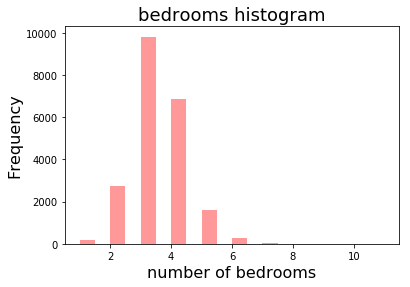

In [407]:
#Creating a histogram for bedrooms to see the distribution 
sns.distplot(df['bedrooms'], kde=False, color='red', bins=20)
plt.title('bedrooms histogram', fontsize=18)
plt.xlabel('number of bedrooms', fontsize=16)
plt.ylabel('Frequency', fontsize=16)


Text(0, 0.5, 'Price')

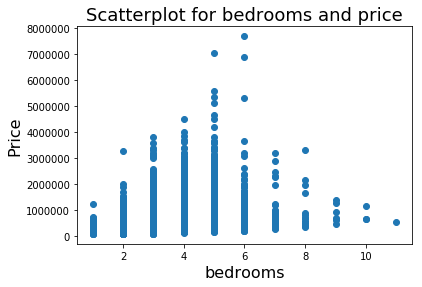

In [408]:
#Create Scatterplot for bedrooms and price, We can see that the 33 bedroom house wouldnt be essential in out data since its so far away from any of the other points
#You can also observe clearly that the most expensive homes had either 5 or 6 bedrooms.
scat = df[["bedrooms","price"]]
vals = scat.values
plt.scatter(vals[:,0],vals[:,1]);
plt.title('Scatterplot for bedrooms and price', fontsize=18)
plt.xlabel('bedrooms', fontsize=16)
plt.ylabel('Price', fontsize=16)


In [409]:
df = df[df['bathrooms'] < 7.5] #dropping the 4 homes that had 7.5 or higher bathrooms

In [410]:
df.sort_values(by = ['bathrooms'], axis =0, ascending = True) #Checking the distribution for bathrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2259,3971701455,10/3/2014,273000.0,2,0.50,1180,7750,1.0,0.0,0.0,...,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976
12029,2991000160,12/12/2014,312500.0,4,0.50,2300,5570,2.0,0.0,0.0,...,8,2300,?,1996,NaN,98092,47.3285,-122.168,1820,6371
11662,7987400316,8/14/2014,255000.0,1,0.50,880,1642,1.0,0.0,0.0,...,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992
10413,7129800036,1/14/2015,109000.0,2,0.50,580,6900,1.0,0.0,0.0,...,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357
16326,6146600170,7/3/2014,100000.0,2,0.75,660,5240,1.0,0.0,0.0,...,4,660,0.0,1912,0.0,98032,47.3881,-122.234,850,5080
1969,2129700320,5/5/2015,250000.0,1,0.75,940,87120,1.0,0.0,0.0,...,6,940,0.0,1944,0.0,98019,47.7182,-121.956,1930,165528
1973,5101404170,11/13/2014,200000.0,1,0.75,680,9600,1.0,0.0,0.0,...,5,680,0.0,1947,NaN,98115,47.6964,-122.306,1580,6624
3801,7335400215,5/5/2015,95000.0,1,0.75,760,5746,1.0,0.0,0.0,...,5,760,0.0,1915,0.0,98002,47.3046,-122.215,970,6696
350,7325600160,6/4/2014,299000.0,1,0.75,560,12120,1.0,NaN,0.0,...,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207


In [411]:
df1.sort_values(by = ['sqft_living'], axis =0, ascending = True)
#Where I saw how I could take out some outliers in sqft_living

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.0,0.0,...,4,410,0.0,1953,0.0,98146,47.5077,-122.357,1190,8636
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.0,0.0,...,4,410,0.0,1953,0.0,98146,47.5077,-122.357,1190,8636
11488,4322200105,3/31/2015,229050.0,1,1.00,420,3298,1.0,0.0,0.0,...,4,420,0.0,1949,0.0,98136,47.5375,-122.391,1460,4975
14452,7549801385,6/12/2014,280000.0,1,0.75,420,6720,1.0,0.0,0.0,...,5,420,0.0,1922,0.0,98108,47.5520,-122.311,1420,6720


In [412]:
df = df[df['sqft_living'] < 9200]
df = df[df['sqft_living'] > 320]
df = pd.concat([df11, df22])
df.sqft_living.max() #Taking out outliers for sqft_living

8670

In [413]:
df=df[df['sqft_above'] < 8000]
df.sort_values(by = ['sqft_above'], axis =0, ascending = True)
#took out the two 8000ft above places

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100


In [414]:
df.sort_values(by = ['sqft_living15'], axis =0, ascending = True) #looks like a fair distribution

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13428,2722059275,5/12/2015,536000.0,3,2.75,2290,34548,2.0,0.0,3.0,...,7,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299
13428,2722059275,5/12/2015,536000.0,3,2.75,2290,34548,2.0,0.0,3.0,...,7,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299
13428,2722059275,5/12/2015,536000.0,3,2.75,2290,34548,2.0,0.0,3.0,...,7,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299
13428,2722059275,5/12/2015,536000.0,3,2.75,2290,34548,2.0,0.0,3.0,...,7,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299
12094,3822200036,6/24/2014,257500.0,2,2.00,1180,9265,1.0,0.0,0.0,...,7,1180,0.0,1940,NaN,98125,47.7252,-122.297,460,18000
12094,3822200036,6/24/2014,257500.0,2,2.00,1180,9265,1.0,0.0,0.0,...,7,1180,0.0,1940,NaN,98125,47.7252,-122.297,460,18000
17272,9421500130,6/16/2014,378000.0,5,2.50,2760,8015,1.0,0.0,0.0,...,8,1600,1160.0,1960,0.0,98125,47.7255,-122.297,460,18000
17272,9421500130,6/16/2014,378000.0,5,2.50,2760,8015,1.0,0.0,0.0,...,8,1600,1160.0,1960,0.0,98125,47.7255,-122.297,460,18000
17272,9421500130,6/16/2014,378000.0,5,2.50,2760,8015,1.0,0.0,0.0,...,8,1600,1160.0,1960,0.0,98125,47.7255,-122.297,460,18000
12094,3822200036,6/24/2014,257500.0,2,2.00,1180,9265,1.0,0.0,0.0,...,7,1180,0.0,1940,NaN,98125,47.7252,-122.297,460,18000


In [415]:
#the max outliers in sqft_lot15 were 4 rows that had 800,000ft
#Also taking out values under 1000ft
# df33.sort_values(by = ['sqft_lot15'], axis =0, ascending = True)
df = df[df['sqft_lot15'] > 1000]
# .sort_values(by = ['sqft_lot15'], axis =0, ascending = True)
df = df[df['sqft_lot15'] < 800000].sort_values(by = ['sqft_lot15'], axis =0, ascending = True)


In [416]:
#taking out NaN values for yr_renovated, waterfront, and view
# df= df[pd.notna(df['yr_renovated'])]
# df= df[pd.notna(df['view'])]
df= df[pd.notna(df['waterfront'])]

In [417]:
df.isna().sum() #Shows that my NaN values were removed

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view               228
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated     13604
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [418]:
df.shape #Checking out the altered matrix dimensions to understand the new size.

(76628, 21)

In [419]:
df.corr() #Checking out if any of my original assumptions about the data set could be supported by the correlation. Realized that lat is far more correlated with price than I assumed.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.019307,0.005617,0.007485,-0.010188,-0.133001,0.015485,-0.004584,0.015184,-0.021080,0.008181,-0.010301,0.020846,-0.010655,-0.006370,-0.004516,0.019305,0.000624,-0.141006
price,-0.019307,1.000000,0.310467,0.522697,0.697985,0.084102,0.266003,0.271151,0.396772,0.040305,0.674872,0.602852,0.057546,0.112466,-0.048864,0.314383,0.022390,0.590598,0.077863
bedrooms,0.005617,0.310467,1.000000,0.515168,0.579422,0.026351,0.185581,-0.004605,0.080568,0.024408,0.359606,0.478731,0.160744,0.015462,-0.152203,-0.011201,0.131692,0.391190,0.024404
bathrooms,0.007485,0.522697,0.515168,1.000000,0.754123,0.077030,0.509949,0.063107,0.181780,-0.126338,0.666079,0.684192,0.511490,0.043094,-0.203245,0.024991,0.225442,0.571014,0.076301
sqft_living,-0.010188,0.697985,0.579422,0.754123,1.000000,0.164627,0.364432,0.102768,0.280070,-0.058477,0.766505,0.875310,0.325849,0.042843,-0.197364,0.053108,0.241948,0.758931,0.174487
sqft_lot,-0.133001,0.084102,0.026351,0.077030,0.164627,1.000000,-0.009177,0.023736,0.068386,-0.013413,0.109749,0.177242,0.055639,0.002247,-0.130148,-0.090060,0.230224,0.146372,0.706219
floors,0.015485,0.266003,0.185581,0.509949,0.364432,-0.009177,1.000000,0.022573,0.029477,-0.262076,0.459952,0.533623,0.488259,0.000438,-0.060128,0.050821,0.129458,0.286138,-0.014079
waterfront,-0.004584,0.271151,-0.004605,0.063107,0.102768,0.023736,0.022573,1.000000,0.406184,0.018361,0.084513,0.070431,-0.025623,0.081087,0.032598,-0.013205,-0.040260,0.086775,0.034007
view,0.015184,0.396772,0.080568,0.181780,0.280070,0.068386,0.029477,0.406184,1.000000,0.047192,0.246032,0.162102,-0.055329,0.095544,0.089071,0.009941,-0.078541,0.274359,0.069272
condition,-0.021080,0.040305,0.024408,-0.126338,-0.058477,-0.013413,-0.262076,0.018361,0.047192,1.000000,-0.144469,-0.157999,-0.360740,-0.061385,0.001258,-0.018085,-0.105880,-0.094429,-0.004063


In [420]:
abs(df.corr()) > 0.75 #Shows that none of the columns, except price itself, is highly correlated with price.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


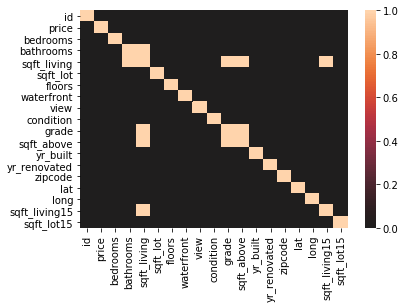

In [421]:
sns.heatmap(abs(df.corr()) > 0.75,center=0)
#Orange blocks represent .75 correlation or greater, which our heatmap clearly shows which predictors will cause multicollinearity and should be removed. 

In [422]:
#creating dummies for zipcodes, Now will be able to see if any zipcodes are good predictors for price.
pd.get_dummies(df['zipcode'], prefix='zip', prefix_sep='_', drop_first=True)
df = pd.concat([df, pd.get_dummies(df['zipcode'],
  prefix='zip',
  prefix_sep='_',
  drop_first=True)], axis=1)

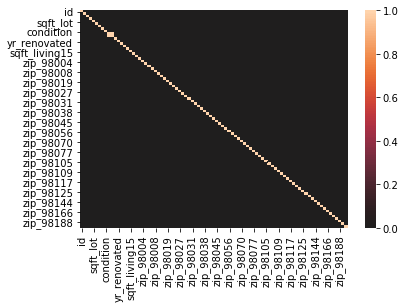

In [423]:
#Start of taking out collinear variables and then regressing without them or the outliers that were taken out. 
#Trying to make r^2 better and better.
#Taking out 'sqft_living' has removed nearly all collinearity in our data frame.
df=df.drop(['sqft_living'], axis =1)
sns.heatmap(abs(df.corr()) > 0.75,center=0)

In [424]:
y = 'price'
x =  ['bedrooms', 'bathrooms', 
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x) 
formula = y + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
#Same OLS from the beginning with all columns except 'sqft_living', checking the differences from our cleaning



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     8754.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:45   Log-Likelihood:            -8.5609e+05
No. Observations:               62836   AIC:                         1.712e+06
Df Residuals:                   62819   BIC:                         1.712e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.324e+06    1.7e+06     -3.125      0.002   -8.66e+06   -1.98e+06
bedrooms      -1.583e+04   1052.357    -15.046      0.000   -1.79e+04   -1.38e+04
bathrooms      8.477e+04   1739.002     48.745      0.000    8.14e+04    8.82e+04
sqft_lot          0.1512      0.028      5.477      0.000       0.097       0.205
floors        -2.623e+04   2016.403    -13.007      0.000   -3.02e+04   -2.23e+04
waterfront     5.794e+05   1.02e+04     56.998      0.000    5.59e+05    5.99e+05
view            6.26e+04   1241.792     50.414      0.000    6.02e+04     6.5e+04
condition      3.217e+04   1365.505     23.560      0.000    2.95e+04    3.48e+04
grade          1.103e+05   1244.596     88.620      0.000    1.08e+05    1.13e+05
sqft_above      120.3335      1.955     61.558      0.000     116.502     124.165
yr_built      -2871.6917     42.001    -68.371      0.000   -2954.015   -2789.369
yr_renovated     15.9467      2.147      7.429      0.000      11.739      20.154
zipcode        -499.4680     19.186    -26.033      0.000    -537.073    -461.863
lat            6.203e+05   6229.947     99.567      0.000    6.08e+05    6.33e+05
long          -2.425e+05   7639.189    -31.746      0.000   -2.57e+05   -2.28e+05
sqft_living15    47.6594      1.995     23.895      0.000      43.750      51.569
sqft_lot15       -0.2179      0.043     -5.044      0.000      -0.303      -0.133
==============================================================================
Omnibus:                    43448.444   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1673772.343
Skew:                           2.847   Prob(JB):                         0.00
Kurtosis:                      27.635   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [425]:
y = 'price'
x =  ['bedrooms', 'bathrooms',
     'waterfront', 'view', 'grade','yr_built',
       'sqft_above', 'yr_renovated', 'zipcode',
       'lat','long','sqft_living15', 'sqft_lot15']
predictors = '+'.join(x) 
formula = y + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
#Took the previous OLS, but now removing ‘sqft_lot’, ‘condition’, ‘floors’.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 1.058e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:45   Log-Likelihood:            -8.5649e+05
No. Observations:               62836   AIC:                         1.713e+06
Df Residuals:                   62822   BIC:                         1.713e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.32e+06   1.67e+06      3.186      0.001    2.05e+06    8.59e+06
bedrooms      -1.292e+04   1049.853    -12.305      0.000    -1.5e+04   -1.09e+04
bathrooms      8.512e+04   1719.061     49.513      0.000    8.17e+04    8.85e+04
waterfront     5.817e+05   1.02e+04     56.878      0.000    5.62e+05    6.02e+05
view           6.409e+04   1247.913     51.354      0.000    6.16e+04    6.65e+04
grade          1.111e+05   1251.024     88.800      0.000    1.09e+05    1.14e+05
yr_built      -3394.1539     37.887    -89.586      0.000   -3468.413   -3319.895
sqft_above      108.3792      1.834     59.092      0.000     104.784     111.974
yr_renovated      5.1568      2.123      2.428      0.015       0.995       9.319
zipcode        -576.2038     19.103    -30.163      0.000    -613.646    -538.761
lat            6.041e+05   6238.354     96.843      0.000    5.92e+05    6.16e+05
long          -2.323e+05   7655.068    -30.343      0.000   -2.47e+05   -2.17e+05
sqft_living15    50.8686      1.969     25.833      0.000      47.009      54.728
sqft_lot15       -0.0104      0.032     -0.324      0.746      -0.074       0.053
==============================================================================
Omnibus:                    43633.024   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1693935.937
Skew:                           2.863   Prob(JB):                         0.00
Kurtosis:                      27.783   Cond. No.                     2.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [429]:
#Multi Regression with dummy variables for zipcodes, dropped my collinear column of 'sqft_living', with all outliers and NaN values taken out, and dropping columns that are not beneficial.

y = 'price'
x =  ['bedrooms', 'bathrooms',
     'waterfront', 'view', 'grade',
       'sqft_above', 'yr_renovated', 'yr_built', 'zipcode', 'sqft_living15',
       'lat','long', 'sqft_lot15','zip_98146','zip_98148', 'zip_98155', 'zip_98166',
       'zip_98168', 'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198',
       'zip_98199']
predictors = '+'.join(x) 
formula = y + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     6133.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:25:30   Log-Likelihood:            -8.5594e+05
No. Observations:               62836   AIC:                         1.712e+06
Df Residuals:                   62812   BIC:                         1.712e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.389e+06   2.25e+06     -2.841      0.004   -1.08e+07   -1.98e+06
bedrooms      -1.076e+04   1046.012    -10.288      0.000   -1.28e+04   -8711.688
bathrooms      8.136e+04   1713.457     47.481      0.000     7.8e+04    8.47e+04
waterfront     5.913e+05   1.02e+04     58.139      0.000    5.71e+05    6.11e+05
view           6.526e+04   1242.952     52.508      0.000    6.28e+04    6.77e+04
grade           1.07e+05   1249.774     85.581      0.000    1.05e+05    1.09e+05
sqft_above      111.5762      1.823     61.201      0.000     108.003     115.150
yr_renovated      5.7603      2.107      2.734      0.006       1.631       9.890
yr_built      -3301.8107     37.924    -87.065      0.000   -3376.141   -3227.480
zipcode        -458.6875     25.476    -18.005      0.000    -508.621    -408.754
sqft_living15    51.7097      1.965     26.322      0.000      47.859      55.560
lat            6.167e+05   6753.811     91.318      0.000    6.04e+05     6.3e+05
long          -2.276e+05   7692.200    -29.591      0.000   -2.43e+05   -2.13e+05
sqft_lot15        0.0147      0.032      0.459      0.646      -0.048       0.077
zip_98146     -3.439e+04   7159.455     -4.803      0.000   -4.84e+04   -2.04e+04
zip_98148     -4.227e+04   1.56e+04     -2.714      0.007   -7.28e+04   -1.17e+04
zip_98155     -1.308e+05   6060.501    -21.579      0.000   -1.43e+05   -1.19e+05
zip_98166     -5.366e+04   7845.225     -6.840      0.000    -6.9e+04   -3.83e+04
zip_98168      -2.13e+04   7671.470     -2.777      0.005   -3.63e+04   -6266.693
zip_98177     -8.815e+04   7764.243    -11.353      0.000   -1.03e+05   -7.29e+04
zip_98178     -5.187e+04   7868.483     -6.593      0.000   -6.73e+04   -3.65e+04
zip_98188     -2.065e+04   1.07e+04     -1.935      0.053   -4.16e+04     263.925
zip_98198     -2.025e+04   7924.029     -2.555      0.011   -3.58e+04   -4715.546
zip_98199      1.323e+05   7362.062     17.967      0.000    1.18e+05    1.47e+05
==============================================================================
Omnibus:                    44746.147   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1852106.863
Skew:                           2.954   Prob(JB):                         0.00
Kurtosis:                      28.933   Cond. No.                     2.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""